## PSK Modulation with Noise
PSK Modulation encodes bits both in the cosine and sine of a complex signal, allowing for a higher bitrate without requiring wider bandwidth.  This gain does come at a cost though: SNR.  Viewed in the complex plane, PSK symbols are placed around the ring of a circle centered at 0 with unit radius.  The angle between symbols, $\Delta \phi$, is inversely proportiona to the number of bits encoded in a single symbol.  Noise viewed on the complex plane shifts points both left-right and up-down.  Independent, Identically Distributed (IID) noise shifts points equally up-down and right-left.  As $\Delta \phi$ Decreases, noise obfuscates the constellation and it becomes difficult to decode without errors.

When receiving a PSK encoded signal mixed with IID noise, it is safe to assume that all constellation outcomes are equally likely.  The reason for this is that it is rare that the packet being sent will have pattern at an integer multiple of the number of bits per symbol e.g. 8 bit/char ascii text is unlikely to produce patterns when encoded in the 3-bit sequences of 8-PSK.  Compressed text would have even higher entropy, again making this a non-issue.  Equal priors mean that ML detection is an optimal solution.  With IID noise, the only difference between the constellation points (classes) is their mean values.  In rectangular coordinates these means could be described in 2 dimensions, however it is easier to think in polar coordinates.  The mean radius is 1 for all classes, so the only factor used in the decision process will be the angle.  The decision boundaries are then placed half way between each ideal angle, or at $k*\Delta \phi + \Delta \phi / 2, k=1:n$ for n-PSK modulation.

In this homework, an example file of 8-PSK data in white noise is provided, and is decoded into the most likely message. General functions are developed to decode n-psk symbols to bits, and to convert a bitstream into characters. The decoded message reads "can you hear me majoj twm".  Twm might me dissapointed we don't have his name quite right but the message is understood.

# Appendix A: Matlab Code

In [3]:
pkg load mapping
pkg load communications
pkg load statistics

In [4]:
load('hwk4.mat')

In [5]:
function bits = decode_npsk(nbits, pkt)
    deltaphi = 2*pi / (2^nbits);
    angle(pkt);
    % Adding deltaphi / 2, wrapping to 2 pi then rounding down 
    % is the same as just rounding to nearest center
    angles = wrapTo2Pi(angle(pkt) + deltaphi / 2);
    decisions = idivide(angles, deltaphi);
    bits = de2bi(decisions, nbits, "left-msb");
end

I used the [Ascii table](http://www.asciitable.com/) to make this function simpler and avoid a case statement.

In [6]:
function str = bits2string(bitvec, bperchar)
    onerow = reshape(bitvec', [], 1);
    bits = reshape(onerow, bperchar, [])';
    string = [''];
    for it=1:size(bits)(1)
        bitchar = num2str(bits(it,:));
        bitchar(isspace(bitchar)) = '';
        if bitchar == '00000'
            string(it) = ' ';
        else
            % Ascii a=
            string(it) = char(bin2dec(bitchar)+96);
        end
    end
    str = string;
end

Test bitstring to letters function

In [7]:
go_on = [ 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 ];
bits2string(go_on, 5)

ans = go on


Plot points in constellation

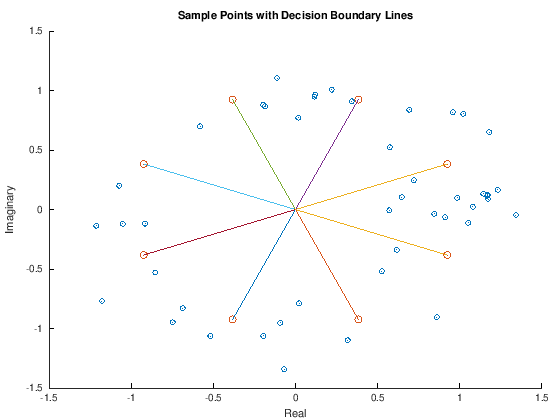

In [39]:
r = 0:7;
deltaphi = 2*pi / 8;
angles = deltaphi .*r + deltaphi / 2;
bounds = 1*exp(i*angles);
scatter(real(y), imag(y), 200, 'o');
hold on
scatter(real(bounds), imag(bounds), 400, 'o')
bwzeros = vertcat(zeros(1, length(bounds)), bounds);
plot(real(bwzeros), imag(bwzeros), '-')
title('Sample Points with Decision Boundary Lines')
xlabel('Real')
ylabel('Imaginary')

In [40]:
bits = decode_npsk(3, y);

In [41]:
bits2string(bits, 5)

ans = can you hear me majoj twm  


The final step is to use the semantic language decoding algorithm we have built in as humans to round this message to "Can you hear me major Tom".